In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
import os
import shutil

# Hawaii 2018 VEST File
https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/UBKYRU/XDCPO5&version=36.0
updated 6/8/2020, accessed 5/27/2021

In [2]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-hi'

In [3]:
gdfv = gpd.read_file('./raw-from-source/hi_2018/hi_2018.shp')

In [4]:
gdfv

,COUNTY,PRECINCT,G18USSDHIR,G18USSRCUR,G18GOVDIGE,G18GOVRTUP,G18GOVGBRE,G18GOVITER,geometry
0,HAWAII,07-03,1730,554,1553,668,59,13,"POLYGON ((-155.78978 20.24791, -155.78975 20.2..."
1,HAWAII,01-05,808,194,714,247,26,12,"POLYGON ((-155.11901 19.88276, -155.11887 19.8..."
2,HAWAII,01-01,1127,319,924,480,35,11,"POLYGON ((-155.69903 20.18606, -155.69865 20.1..."
3,HAWAII,01-02,387,122,339,149,19,5,"POLYGON ((-155.40968 20.07713, -155.40942 20.0..."
4,HAWAII,01-06,599,193,557,207,29,6,"POLYGON ((-155.13126 19.82529, -155.13104 19.8..."
...,...,...,...,...,...,...,...,...,...
257,OAHU,49-06,725,302,691,309,24,9,"POLYGON ((-157.81042 21.38411, -157.80898 21.3..."
258,OAHU,51-01,881,390,809,436,23,7,"POLYGON ((-157.74719 21.39174, -157.74681 21.3..."
259,OAHU,47-01,994,467,828,554,57,16,"POLYGON ((-158.11973 21.56499, -158.12038 21.5..."
260,OAHU,41-05,1250,792,1080,909,36,12,"POLYGON ((-158.02390 21.33705, -158.02356 21.3..."


In [5]:
gdfv.PRECINCT.nunique()

262

In [6]:
gdfv.COUNTY.value_counts()

OAHU      160
HAWAII     51
MAUI       35
KAUAI      16
Name: COUNTY, dtype: int64

# Hawaii - test data load

In [7]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-hi'

**Notes:**
- (https://elections.hawaii.gov/election-results/) linked in documentation, however url for each year changes, but webpage only displays 2020 data..?
    - link to precinct results in csv format but not a file, just brings to txt webpage, so copy paste all into txt file to read in...
- (http://geoportal.hawaii.gov/datasets/election-precincts-) 2017 shapefile downloaded from HI Statewide GIS program


# Shapefile load

In [8]:
shp = gpd.read_file('./raw-from-source/Election_Precincts_/Election_Precincts_.shp')

In [9]:
shp.head()

,objectid,dp,dpnum,dptype,county,zeropop,ballottype,us_house,state_hous,state_sena,county_cou,st_areasha,st_perimet,geometry
0,1,07-03,703,PP,HAWAII,None,CD2-H07-S04-CC9,CD2,H7,S4,CC9,3.433163e+08,100748.260922,"POLYGON ((-155.78978 20.24791, -155.78975 20.2..."
1,2,01-05,105,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.434849e+08,75515.354158,"POLYGON ((-155.11901 19.88276, -155.11887 19.8..."
2,3,01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,3.771898e+08,141411.346571,"POLYGON ((-155.69903 20.18606, -155.69865 20.1..."
3,4,01-02,102,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,2.207124e+08,69022.641881,"POLYGON ((-155.40968 20.07713, -155.40942 20.0..."
4,5,01-06,106,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.087545e+08,72825.893157,"POLYGON ((-155.13126 19.82529, -155.13104 19.8..."


In [10]:
shp['dp'].nunique()

262

In [11]:
set(shp['dp'])-set(gdfv.PRECINCT)

set()

Great! Unique ID matches between gdfv and shp off the bat

# Election results load

In [12]:
df = pd.read_csv('./raw-from-source/hi_2018_election_results.txt', delimiter = ',')

In [13]:
df

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
0,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,1,"(R) CURTIS, Ron",NaN,C,142,24,153
1,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,2,"(D) HIRONO, Mazie K.",NaN,C,541,86,500
2,01-01,NaN,1,2912,1472,1,3,"U.S. Representative, Dist II",NaN,8,"(D) GABBARD, Tulsi",NaN,C,574,89,548
3,01-01,NaN,1,2912,1472,1,3,"U.S. Representative, Dist II",NaN,9,"(R) EVANS, Brian",NaN,C,98,18,101
4,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,10,(G) BREWER / ING,NaN,C,14,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,51-06,NaN,249,3039,1495,1,50,Constitutional Convention,NaN,122,NO,NaN,C,468,25,633
8026,51-06,NaN,249,3039,1495,1,51,CON. AMEND.: Public Education and Investment R...,NaN,123,YES,NaN,C,130,10,236
8027,51-06,NaN,249,3039,1495,1,51,CON. AMEND.: Public Education and Investment R...,NaN,124,NO,NaN,C,409,22,519
8028,51-06,NaN,249,3039,1495,1,63,HONOLULU: Honolulu Authority for Rapid Transpo...,NaN,147,YES,NaN,C,162,14,333


In [14]:
df['Precinct_Name'].nunique()

249

In [15]:
set(shp['dp']) - set(df['Precinct_Name'])

{'01-10',
 '01-11',
 '04-05',
 '05-09',
 '05-10',
 '05-11',
 '07-06',
 '07-07',
 '31-06',
 '35-07',
 '37-05',
 '39-05',
 '45-06'}

In [16]:
gdfv[gdfv.PRECINCT.isin(list(set(shp['dp']) - set(df['Precinct_Name'])))]

,COUNTY,PRECINCT,G18USSDHIR,G18USSRCUR,G18GOVDIGE,G18GOVRTUP,G18GOVGBRE,G18GOVITER,geometry
39,HAWAII,07-06,0,0,0,0,0,0,"POLYGON ((-155.81393 19.70189, -155.78874 19.6..."
41,HAWAII,01-11,0,0,0,0,0,0,"POLYGON ((-155.55025 19.98017, -155.55015 19.9..."
42,HAWAII,01-10,0,0,0,0,0,0,"POLYGON ((-155.43905 19.90429, -155.43883 19.9..."
43,HAWAII,04-05,0,0,0,0,0,0,"POLYGON ((-155.23844 19.41583, -155.23067 19.4..."
44,HAWAII,05-09,0,0,0,0,0,0,"POLYGON ((-155.48324 19.69085, -155.48258 19.6..."
45,HAWAII,05-10,0,0,0,0,0,0,"POLYGON ((-155.34540 19.59619, -155.34531 19.5..."
46,HAWAII,05-11,0,0,0,0,0,0,"POLYGON ((-155.51167 19.66242, -155.51384 19.6..."
48,HAWAII,07-07,0,0,0,0,0,0,"POLYGON ((-155.60890 19.83873, -155.60866 19.8..."
180,OAHU,39-05,0,0,0,0,0,0,"POLYGON ((-158.08684 21.45319, -158.08641 21.4..."
236,OAHU,31-06,0,0,0,0,0,0,"POLYGON ((-157.93265 21.37608, -157.93243 21.3..."


In [17]:
set(df['Precinct_Name']) - set(shp['dp'])

set()

Off the bat see that all of the id's in the df match something in the gdfv and shp (Great!) but there are 13 values not present in the election results present in the other two files which will need to be added/sorted out... All 13 are precincts with zero votes (wow does hawaii have super low voter turn out?

So, can do outer join with the shp, then populate the missing values with '0' in place of Nan.

In [18]:
df['Contest_title'][df['Contest_title'].str.slice(stop = 5) != 'State'].value_counts()

At-Large Trustee                                                                  1494
Governor and Lieutenant Governor                                                   996
U.S. Representative, Dist I                                                        575
CON. AMEND.: Public Education and Investment Real Property                         498
Maui Resident Trustee                                                              498
Constitutional Convention                                                          498
U.S. Senator                                                                       498
Oahu Resident Trustee                                                              498
HONOLULU: Honolulu Authority for Rapid Transportation                              310
U.S. Representative, Dist II                                                       268
Councilmember, County of Kauai                                                     224
HAWAI'I: Public Notice and Voting Requireme

In [19]:
gdfv.columns #US Senate, Governor

Index(['COUNTY', 'PRECINCT', 'G18USSDHIR', 'G18USSRCUR', 'G18GOVDIGE',
       'G18GOVRTUP', 'G18GOVGBRE', 'G18GOVITER', 'geometry'],
      dtype='object')

In [20]:
df.columns

Index(['Precinct_Name', 'Split_Name', 'precinct_splitId', 'Reg_voters',
       'Ballots', 'Reporting', 'Contest_id', 'Contest_title', 'Contest_party',
       'Choice_id', 'Candidate_name', 'Choice_party', 'Candidate_Type',
       'Absentee_votes', 'Early_votes', 'Election_Votes'],
      dtype='object')

In [21]:
df

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
0,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,1,"(R) CURTIS, Ron",NaN,C,142,24,153
1,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,2,"(D) HIRONO, Mazie K.",NaN,C,541,86,500
2,01-01,NaN,1,2912,1472,1,3,"U.S. Representative, Dist II",NaN,8,"(D) GABBARD, Tulsi",NaN,C,574,89,548
3,01-01,NaN,1,2912,1472,1,3,"U.S. Representative, Dist II",NaN,9,"(R) EVANS, Brian",NaN,C,98,18,101
4,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,10,(G) BREWER / ING,NaN,C,14,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,51-06,NaN,249,3039,1495,1,50,Constitutional Convention,NaN,122,NO,NaN,C,468,25,633
8026,51-06,NaN,249,3039,1495,1,51,CON. AMEND.: Public Education and Investment R...,NaN,123,YES,NaN,C,130,10,236
8027,51-06,NaN,249,3039,1495,1,51,CON. AMEND.: Public Education and Investment R...,NaN,124,NO,NaN,C,409,22,519
8028,51-06,NaN,249,3039,1495,1,63,HONOLULU: Honolulu Authority for Rapid Transpo...,NaN,147,YES,NaN,C,162,14,333


In [22]:
df = df[(df['Contest_title'] == 'U.S. Senator')|(df['Contest_title'] == 'Governor and Lieutenant Governor')]

Columns to replicate: 'G18USSDHIR', 'G18USSRCUR', 'G18GOVDIGE',
       'G18GOVRTUP', 'G18GOVGBRE', 'G18GOVITER'

In [23]:
df['Candidate_name'].str.slice(start=1,stop=2).value_counts()

R    498
D    498
G    249
N    249
Name: Candidate_name, dtype: int64

In [24]:
df.loc[df['Contest_id']==1, 'race'] = 'USS'
df.loc[df['Contest_id']==4, 'race'] = 'GOV'

df['party'] = df['Candidate_name'].str.slice(start=1,stop=2)
df.loc[df['party'] == 'N', 'party'] = 'I'
df['short_name'] = df['Candidate_name'].str.slice(start=4, stop=7)
df['column_header'] = 'G18' + df['race']+df['party']+df['short_name']

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 

In [25]:
df['party'].value_counts()

R    498
D    498
G    249
I    249
Name: party, dtype: int64

In [26]:
df[df['party'] == 'I']

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes,race,party,short_name,column_header
6,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,9,2,0,GOV,I,TER,G18GOVITER
32,01-02,NaN,2,940,519,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,4,0,1,GOV,I,TER,G18GOVITER
58,01-03,NaN,3,1042,575,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,2,0,1,GOV,I,TER,G18GOVITER
84,01-04,NaN,4,324,192,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,0,0,0,GOV,I,TER,G18GOVITER
110,01-05,NaN,5,1848,1015,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,5,3,4,GOV,I,TER,G18GOVITER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,51-02,NaN,245,2912,1818,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,5,0,8,GOV,I,TER,G18GOVITER
7932,51-03,NaN,246,1563,889,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,3,0,4,GOV,I,TER,G18GOVITER
7958,51-04,NaN,247,4282,2580,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,9,0,12,GOV,I,TER,G18GOVITER
7984,51-05,NaN,248,3032,1382,1,4,Governor and Lieutenant Governor,NaN,12,(N) TERUYA / ROBOTTI,NaN,C,1,0,9,GOV,I,TER,G18GOVITER


In [27]:
df['vote_total'] = df['Absentee_votes'] + df['Early_votes'] + df['Election_Votes']

<ipython-input-27-a7ffe9a0834a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_total'] = df['Absentee_votes'] + df['Early_votes'] + df['Election_Votes']


In [28]:
df

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,...,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes,race,party,short_name,column_header,vote_total
0,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,1,...,NaN,C,142,24,153,USS,R,CUR,G18USSRCUR,319
1,01-01,NaN,1,2912,1472,1,1,U.S. Senator,NaN,2,...,NaN,C,541,86,500,USS,D,HIR,G18USSDHIR,1127
4,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,10,...,NaN,C,14,2,19,GOV,G,BRE,G18GOVGBRE,35
5,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,11,...,NaN,C,208,33,239,GOV,R,TUP,G18GOVRTUP,480
6,01-01,NaN,1,2912,1472,1,4,Governor and Lieutenant Governor,NaN,12,...,NaN,C,9,2,0,GOV,I,TER,G18GOVITER,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,51-06,NaN,249,3039,1495,1,1,U.S. Senator,NaN,2,...,NaN,C,459,23,641,USS,D,HIR,G18USSDHIR,1123
8008,51-06,NaN,249,3039,1495,1,4,Governor and Lieutenant Governor,NaN,10,...,NaN,C,14,2,18,GOV,G,BRE,G18GOVGBRE,34
8009,51-06,NaN,249,3039,1495,1,4,Governor and Lieutenant Governor,NaN,11,...,NaN,C,258,15,388,GOV,R,TUP,G18GOVRTUP,661
8010,51-06,NaN,249,3039,1495,1,4,Governor and Lieutenant Governor,NaN,12,...,NaN,C,6,0,10,GOV,I,TER,G18GOVITER,16


In [29]:
df['column_header'].value_counts()

G18GOVDIGE    249
G18GOVITER    249
G18USSRCUR    249
G18USSDHIR    249
G18GOVRTUP    249
G18GOVGBRE    249
Name: column_header, dtype: int64

In [30]:
set(df['column_header']) - set(gdfv.columns)
set(gdfv.columns)-set(df['column_header'])

{'COUNTY', 'PRECINCT', 'geometry'}

In [31]:
df.Contest_title.value_counts()

Governor and Lieutenant Governor    996
U.S. Senator                        498
Name: Contest_title, dtype: int64

In [32]:
df.Ballots.value_counts()

770     12
2209    12
1180    12
2668    12
2537    12
        ..
2577     6
2580     6
534      6
2584     6
2043     6
Name: Ballots, Length: 242, dtype: int64

In [33]:
df_pivot = df.pivot_table(index = ['Precinct_Name'],
                          columns = ['column_header'],
                          values = ['vote_total'],
                          aggfunc = 'sum')

In [34]:
df_pivot.reset_index(inplace = True)

In [35]:
df_pivot

Precinct_Name vote_total                                   \
column_header               G18GOVDIGE G18GOVGBRE G18GOVITER G18GOVRTUP   
0                     01-01        924         35         11        480   
1                     01-02        339         19          5        149   
2                     01-03        388         23          3        154   
3                     01-04        131          7          0         52   
4                     01-05        714         26         12        247   
..                      ...        ...        ...        ...        ...   
244                   51-02       1031         42         13        705   
245                   51-03        546         36          7        290   
246                   51-04       1550         55         21        901   
247                   51-05        725         39         10        596   
248                   51-06        756         34         16        661   

                                     
column_header G18USSDHIR G18USSRCUR  
0                   1127        319  
1                    387        122  
2                    452        111  
3                    147         43  
4                    808        194  
..                   ...        ...  
244                 1148        627  
245                  599        275  
246                 1719        803  
247                  937        413  
248                 1123        340  

[249 rows x 7 columns]

In [36]:
df_pivot.columns

MultiIndex([('Precinct_Name',           ''),
            (   'vote_total', 'G18GOVDIGE'),
            (   'vote_total', 'G18GOVGBRE'),
            (   'vote_total', 'G18GOVITER'),
            (   'vote_total', 'G18GOVRTUP'),
            (   'vote_total', 'G18USSDHIR'),
            (   'vote_total', 'G18USSRCUR')],
           names=[None, 'column_header'])

In [37]:
df_pivot.columns = ['Precinct_Name', 'G18GOVDIGE', 'G18GOVGBRE', 'G18GOVITER', 'G18GOVRTUP', 'G18USSDHIR', 'G18USSRCUR']

In [38]:
df_pivot['PRECINCT'] = df_pivot['Precinct_Name'].astype(str)

In [39]:
df_pivot

,Precinct_Name,G18GOVDIGE,G18GOVGBRE,G18GOVITER,G18GOVRTUP,G18USSDHIR,G18USSRCUR,PRECINCT
0,01-01,924,35,11,480,1127,319,01-01
1,01-02,339,19,5,149,387,122,01-02
2,01-03,388,23,3,154,452,111,01-03
3,01-04,131,7,0,52,147,43,01-04
4,01-05,714,26,12,247,808,194,01-05
...,...,...,...,...,...,...,...,...
244,51-02,1031,42,13,705,1148,627,51-02
245,51-03,546,36,7,290,599,275,51-03
246,51-04,1550,55,21,901,1719,803,51-04
247,51-05,725,39,10,596,937,413,51-05


# Prep for join

In [40]:
shp['PRECINCT'] = shp['dp']

<AxesSubplot:>

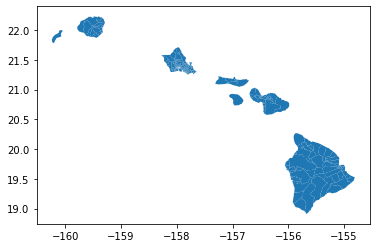

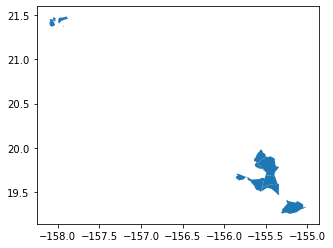

In [41]:
shp.plot()
shp[shp.PRECINCT.isin(list(set(shp['dp']) - set(df['Precinct_Name'])))].plot()

# Join attempt 1

In [42]:
shp.head()

,objectid,dp,dpnum,dptype,county,zeropop,ballottype,us_house,state_hous,state_sena,county_cou,st_areasha,st_perimet,geometry,PRECINCT
0,1,07-03,703,PP,HAWAII,None,CD2-H07-S04-CC9,CD2,H7,S4,CC9,3.433163e+08,100748.260922,"POLYGON ((-155.78978 20.24791, -155.78975 20.2...",07-03
1,2,01-05,105,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.434849e+08,75515.354158,"POLYGON ((-155.11901 19.88276, -155.11887 19.8...",01-05
2,3,01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,3.771898e+08,141411.346571,"POLYGON ((-155.69903 20.18606, -155.69865 20.1...",01-01
3,4,01-02,102,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,2.207124e+08,69022.641881,"POLYGON ((-155.40968 20.07713, -155.40942 20.0...",01-02
4,5,01-06,106,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.087545e+08,72825.893157,"POLYGON ((-155.13126 19.82529, -155.13104 19.8...",01-06


In [43]:
crs = gdfv.crs
shp = shp.to_crs(crs)

<AxesSubplot:>

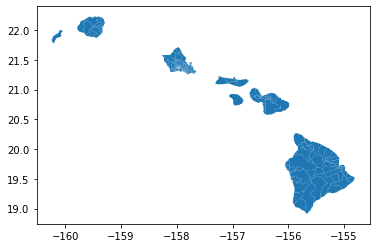

In [44]:
join = gpd.GeoDataFrame(pd.merge(df_pivot, shp, on = 'PRECINCT', how = 'outer'), crs = crs)
join.plot()

<AxesSubplot:>

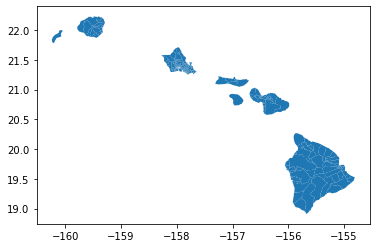

In [45]:
shp.plot()

<AxesSubplot:>

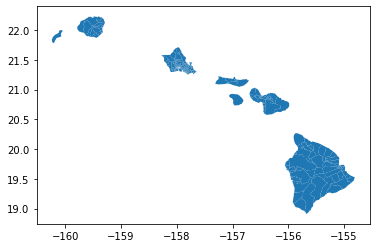

In [46]:
gdfv.plot()

# Validation:

## Shapefile validation:

In [67]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=gdfv.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=gdfv.crs)
source_geoms = source_geoms.to_crs(gdfv.crs)
vest_geoms = vest_geoms.to_crs(gdfv.crs)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True    262
dtype: int64


In [68]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<ipython-input-68-787353f6cb91>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = float(diff.area/10e6)


In [69]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(262, 1)
262 precincts w/ a difference of 0 km^2
0 precincts w/ a difference between 0 and .1 km^2
0 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


# Election result differences

## Statewide Totals

In [70]:
gdfv.columns

Index(['COUNTY', 'PRECINCT', 'G18USSDHIR', 'G18USSRCUR', 'G18GOVDIGE',
       'G18GOVRTUP', 'G18GOVGBRE', 'G18GOVITER', 'geometry'],
      dtype='object')

In [71]:
column_list = ['G18USSDHIR', 'G18USSRCUR', 'G18GOVDIGE','G18GOVRTUP', 'G18GOVGBRE', 'G18GOVITER']

In [72]:
join = join.fillna(0)

In [96]:
print("Printing differences below:")
for race in column_list:
    #Uncomment the code below to check race totals against State Canvass report (https://files.hawaii.gov/elections/files/results/2018/general/histatewide.pdf)
    #print(race+": "+str(sum(join[race])))
    if ((sum(gdfv[race])-sum(join[race])) != 0):
        print(race+" has a difference of "+str(sum(gdfv[race])-sum(join[race]))+" votes")
        print("\tVEST: "+str(sum(gdfv[race]))+" votes")
        print("\tSOURCES: "+str(sum(join[race]))+" votes")
print("")
print("All other races are equal")

Printing differences below:

All other races are equal


## County-by-county

In [74]:
diff_counties=[]
for i in column_list:
    diff = gdfv.groupby(["COUNTY"]).sum()[i]-join.groupby(["county"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("All other races in all counties are equal")

All other races in all counties are equal


In [75]:
print(join.columns)

Index(['Precinct_Name', 'G18GOVDIGE', 'G18GOVGBRE', 'G18GOVITER', 'G18GOVRTUP',
       'G18USSDHIR', 'G18USSRCUR', 'PRECINCT', 'objectid', 'dp', 'dpnum',
       'dptype', 'county', 'zeropop', 'ballottype', 'us_house', 'state_hous',
       'state_sena', 'county_cou', 'st_areasha', 'st_perimet', 'geometry'],
      dtype='object')


In [76]:
final_df_merge = pd.merge(join, gdfv, on = 'PRECINCT', how = 'outer', suffixes = ('_x', '_y'))

In [77]:
final_df_merge.shape

(262, 30)

In [78]:
final_df_merge = final_df_merge.fillna(0)

In [79]:
for column in column_list:
    print(column, gdfv[column].dtype)

G18USSDHIR int64
G18USSRCUR int64
G18GOVDIGE int64
G18GOVRTUP int64
G18GOVGBRE int64
G18GOVITER int64


In [80]:
for column in column_list:
    print(column, df_pivot[column].dtype)

G18USSDHIR int64
G18USSRCUR int64
G18GOVDIGE int64
G18GOVRTUP int64
G18GOVGBRE int64
G18GOVITER int64


In [81]:
final_df_merge.head()

,Precinct_Name,G18GOVDIGE_x,G18GOVGBRE_x,G18GOVITER_x,G18GOVRTUP_x,G18USSDHIR_x,G18USSRCUR_x,PRECINCT,objectid,dp,...,st_perimet,geometry_x,COUNTY,G18USSDHIR_y,G18USSRCUR_y,G18GOVDIGE_y,G18GOVRTUP_y,G18GOVGBRE_y,G18GOVITER_y,geometry_y
0,01-01,924.0,35.0,11.0,480.0,1127.0,319.0,01-01,3,01-01,...,141411.346571,"POLYGON ((-155.69903 20.18606, -155.69865 20.1...",HAWAII,1127,319,924,480,35,11,"POLYGON ((-155.69903 20.18606, -155.69865 20.1..."
1,01-02,339.0,19.0,5.0,149.0,387.0,122.0,01-02,4,01-02,...,69022.641881,"POLYGON ((-155.40968 20.07713, -155.40942 20.0...",HAWAII,387,122,339,149,19,5,"POLYGON ((-155.40968 20.07713, -155.40942 20.0..."
2,01-03,388.0,23.0,3.0,154.0,452.0,111.0,01-03,6,01-03,...,84913.836425,"POLYGON ((-155.31603 20.03226, -155.31596 20.0...",HAWAII,452,111,388,154,23,3,"POLYGON ((-155.31603 20.03226, -155.31596 20.0..."
3,01-04,131.0,7.0,0.0,52.0,147.0,43.0,01-04,7,01-04,...,60552.140443,"POLYGON ((-155.19276 19.95554, -155.19255 19.9...",HAWAII,147,43,131,52,7,0,"POLYGON ((-155.19276 19.95554, -155.19255 19.9..."
4,01-05,714.0,26.0,12.0,247.0,808.0,194.0,01-05,2,01-05,...,75515.354158,"POLYGON ((-155.11901 19.88276, -155.11887 19.8...",HAWAII,808,194,714,247,26,12,"POLYGON ((-155.11901 19.88276, -155.11887 19.8..."


In [82]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['PRECINCT'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['PRECINCT'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['PRECINCT'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()


In [83]:
validater_row(final_df_merge, column_list)

There are  262  total rows
0  of these rows have election result differences
262  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 5


In [65]:
df_pivot.columns

Index(['Precinct_Name', 'G18GOVDIGE', 'G18GOVGBRE', 'G18GOVITER', 'G18GOVRTUP',
       'G18USSDHIR', 'G18USSRCUR', 'PRECINCT'],
      dtype='object')

In [66]:
gdfv.columns

Index(['COUNTY', 'PRECINCT', 'G18USSDHIR', 'G18USSRCUR', 'G18GOVDIGE',
       'G18GOVRTUP', 'G18GOVGBRE', 'G18GOVITER', 'geometry'],
      dtype='object')

**Next steps:**

    - [x]rename race + candidate things
    - [x]pivot results
    - [x]run validation on shp and election results
    - [ ]write report!